In [1]:

import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:

# Función auxiliar para mostrar imágenes en escala de grises o color
def mostrar_img(img, titulo="Imagen", cmap=None):
    plt.figure(figsize=(5,5))
    if len(img.shape) == 2:  # Escala de grises
        plt.imshow(img, cmap='gray')
    else:  # Color (BGR a RGB para mostrar correctamente)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.axis('off')
    plt.show()

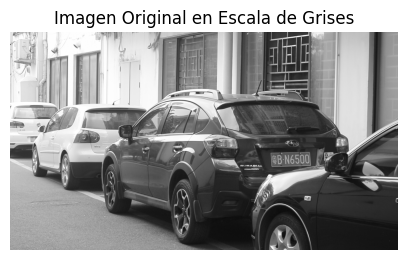

Dimensiones de la imagen: (1080, 1920)


In [3]:

# Cargar imagen en escala de grises
img = cv2.imread( "imagenes/DPP0357.TIF", cv2.IMREAD_GRAYSCALE)
mostrar_img(img, "Imagen Original en Escala de Grises")
print(f"Dimensiones de la imagen: {img.shape}")

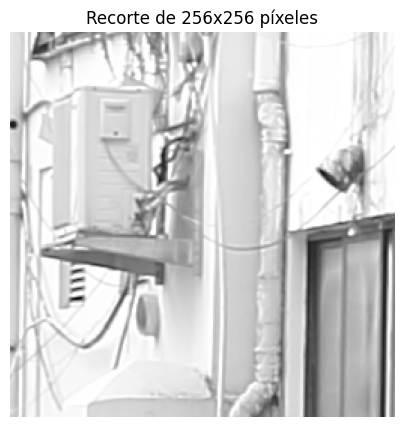

In [4]:
# Recortar una región de interés (ROI) de 256x256 píxeles desde la esquina superior izquierda

img_crop = img[:256, :256]
mostrar_img(img_crop, "Recorte de 256x256 píxeles")

In [5]:

# Construcción manual del histograma
hist_manual = np.zeros(256, dtype=int)
for value in img_crop.flatten():
    hist_manual[value] += 1


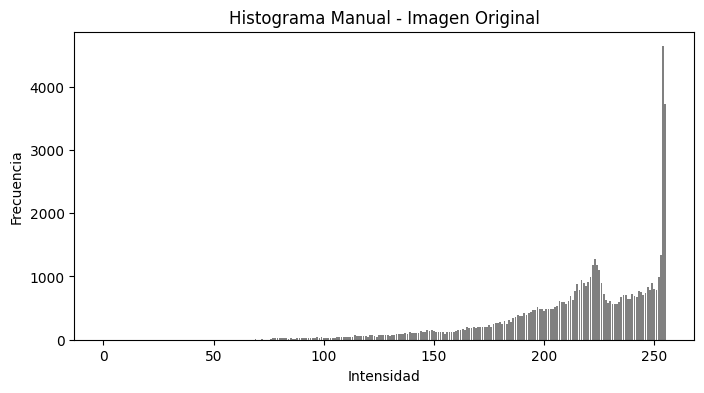

In [6]:

# Visualización del histograma original
plt.figure(figsize=(8,4))
plt.title('Histograma Manual - Imagen Original')
plt.bar(range(256), hist_manual, color='gray')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.show()


In [7]:

# Ecualización de histograma
img_eq = cv2.equalizeHist(img_crop)


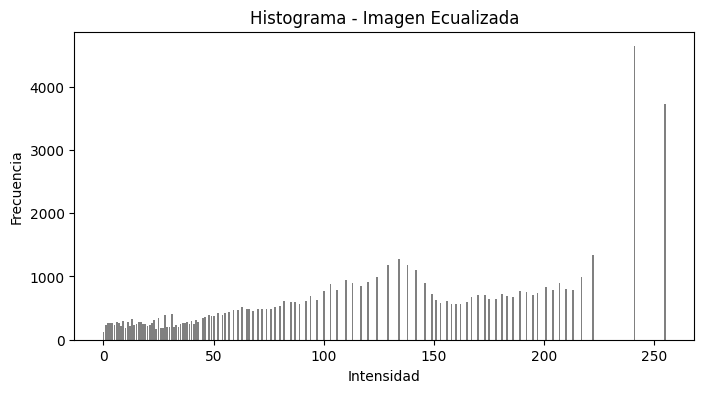

In [8]:

# Histograma de imagen ecualizada
hist_eq = np.zeros(256, dtype=int)
for value in img_eq.flatten():
    hist_eq[value] += 1

plt.figure(figsize=(8,4))
plt.title('Histograma - Imagen Ecualizada')
plt.bar(range(256), hist_eq, color='gray')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.show()


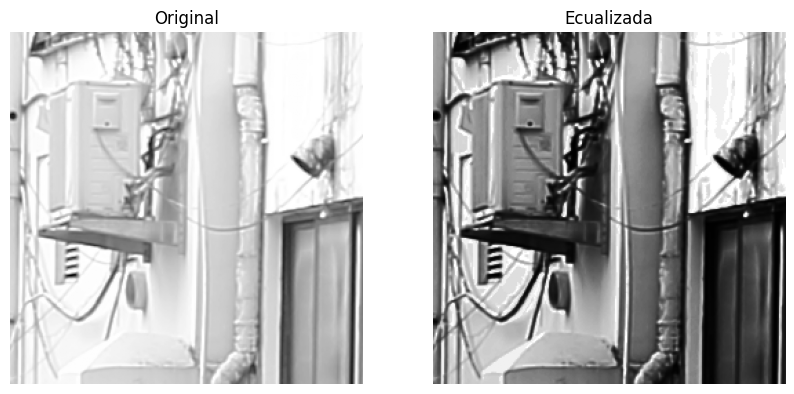

In [9]:

# Comparación visual de imágenes
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img_crop, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Ecualizada')
plt.imshow(img_eq, cmap='gray')
plt.axis('off')
plt.show()


In [10]:

# Aplicación de filtros
kernels = [3, 11]
filters = {
    'Blur': lambda img, k: cv2.blur(img, (k, k)),
    'GaussianBlur': lambda img, k: cv2.GaussianBlur(img, (k, k), 0),
    'MedianBlur': cv2.medianBlur
}



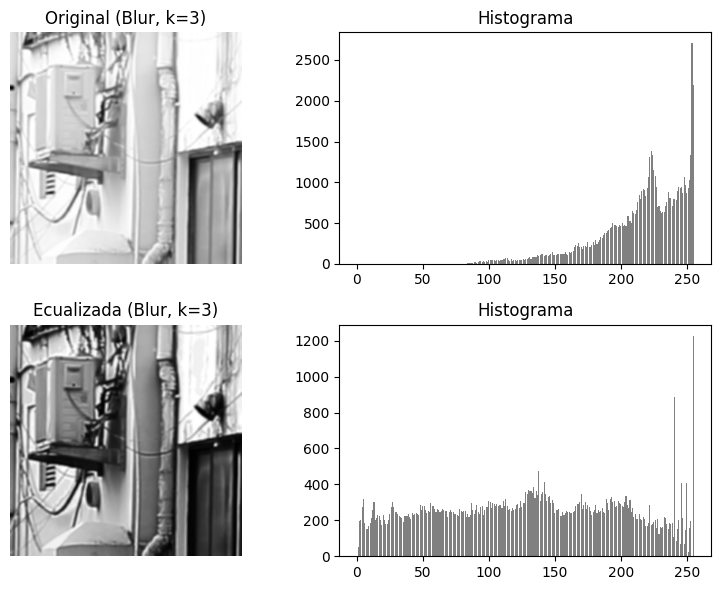

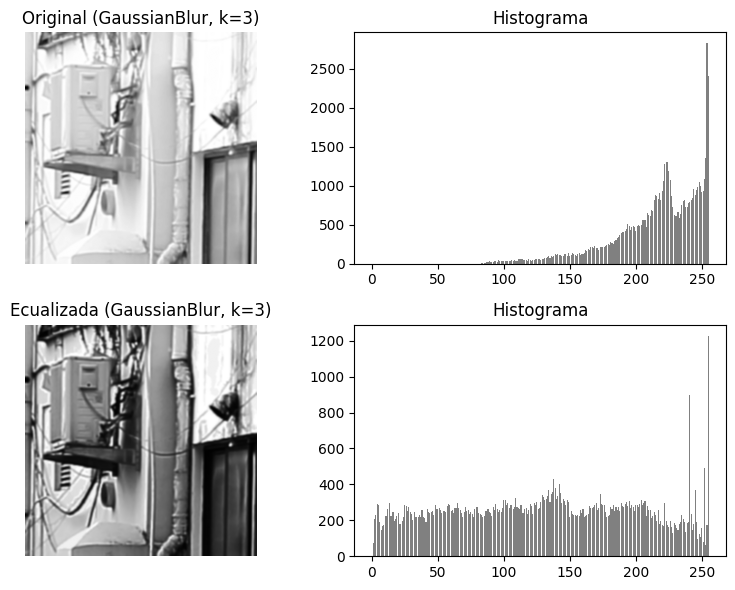

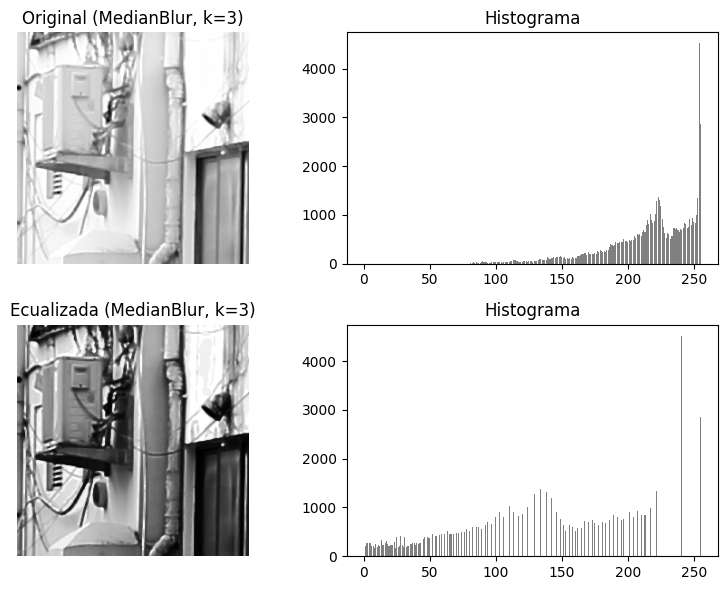

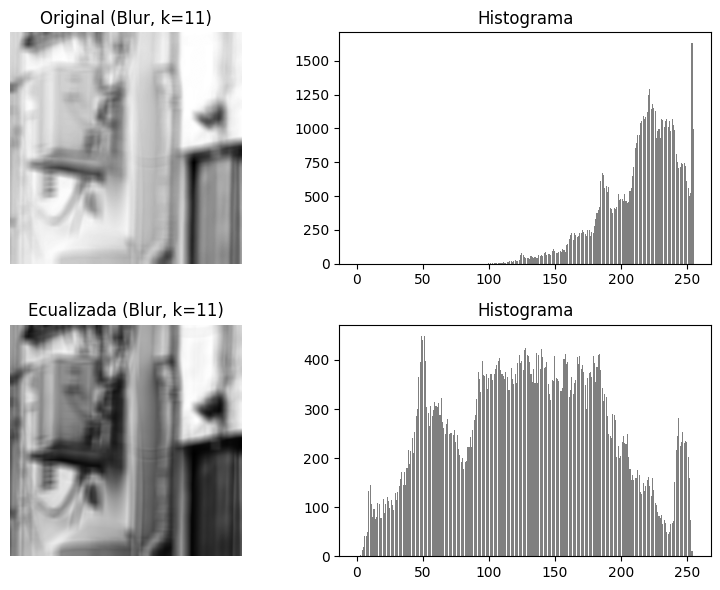

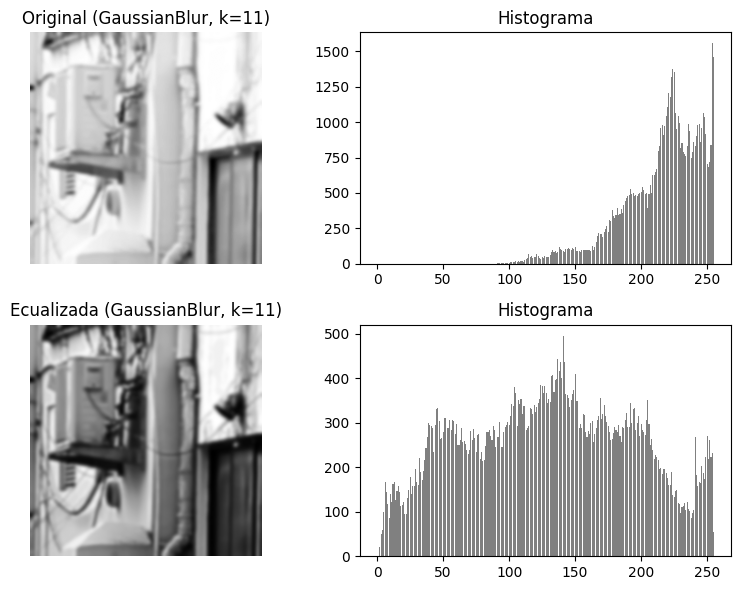

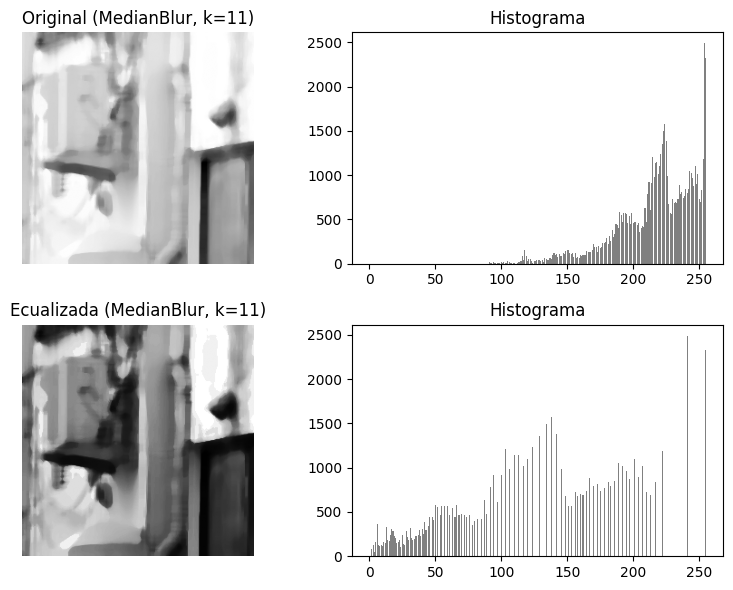

In [11]:


for k in kernels:
    for name, func in filters.items():
        img_filt = func(img_crop, k)
        img_eq_filt = func(img_eq, k)
        # Histograma filtrado original
        hist_filt = np.zeros(256, dtype=int)
        for value in img_filt.flatten():
            hist_filt[value] += 1
        # Histograma filtrado ecualizada
        hist_eq_filt = np.zeros(256, dtype=int)
        for value in img_eq_filt.flatten():
            hist_eq_filt[value] += 1
        # Visualización
        plt.figure(figsize=(12,6))
        plt.subplot(2,3,1)
        plt.title(f'Original ({name}, k={k})')
        plt.imshow(img_filt, cmap='gray')
        plt.axis('off')
        plt.subplot(2,3,2)
        plt.title('Histograma')
        plt.bar(range(256), hist_filt, color='gray')
        plt.subplot(2,3,4)
        plt.title(f'Ecualizada ({name}, k={k})')
        plt.imshow(img_eq_filt, cmap='gray')
        plt.axis('off')
        plt.subplot(2,3,5)
        plt.title('Histograma')
        plt.bar(range(256), hist_eq_filt, color='gray')
        plt.tight_layout()
        plt.show()